# Cyclistic - A Case Study By Callum Oakes

## Introduction

### This is a case study for my Capstone Project that will be presented to prospective employers as evidence of my work that I have completed in attaining my Google Data Aanalytics certificate.


## Background 

### I am a Junior Data Analyst at a Detroit based bike share company called Cyclistic, they have tasked me with making data driven decisions based on a years worth of data to awnser the following questions:

### 1. How do annual members and casual riders use Cyclistic bikes differently?
### 2. Why would casual riders buy Cyclistic annual memberships?
### 3. How can Cyclistic influence casual riders to become members?
### The project came with 12 csv files. These files are each individually massive. Combined all 12 files have around 4.5 million rows. In order to combine these files I used Power Query and combined them into one data model that could be referenced and used in Power BI desktop to visualise the data. I further then used DAX Studio to take all of the cleaned data and export it into a single CSV file that could then be read into Python. The below shows the end product of the data after it had been previously cleaned.

## 1. Importing and setting up the data frame

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
# Reading in the csv file, data has already been cleaned in Power BI.
df_cyclistic = pd.read_csv('Cyclistic.csv')
df_cyclistic

,rideable_type,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,start_date,end_date,start_hour,end_hour,ride_duration,start_month_number,end_month_number,start_month,end_month,ride_duration_mins
0,classic_bike,Desplaines St & Jackson Blvd,15539,Loomis St & Jackson Blvd,13206,41.876679,-87.644146,41.877945,-87.662007,member,2021-05-26 00:00:00.000,2021-05-26 00:00:00.000,17,17,1899-12-30 00:08:33.000,5,5,May,May,8.550000
1,classic_bike,Greenview Ave & Fullerton Ave,TA1307000001,Racine Ave & Fullerton Ave,TA1306000026,41.925330,-87.665800,41.925563,-87.658404,member,2021-05-26 00:00:00.000,2021-05-26 00:00:00.000,17,17,1899-12-30 00:29:02.000,5,5,May,May,29.033333
2,classic_bike,Wentworth Ave & 24th St (Temp),TA1308000026,Normal Ave & Archer Ave,TA1308000014,41.850084,-87.632141,41.849527,-87.640591,member,2021-05-26 00:00:00.000,2021-05-26 00:00:00.000,17,17,1899-12-30 00:05:35.000,5,5,May,May,5.583333
3,classic_bike,Lincoln Ave & Addison St,TA1309000050,Paulina St & Montrose Ave,TA1309000021,41.946176,-87.673308,41.961507,-87.671387,member,2021-05-26 00:00:00.000,2021-05-26 00:00:00.000,17,17,1899-12-30 00:08:05.000,5,5,May,May,8.083333
4,classic_bike,Wabash Ave & Grand Ave,TA1307000117,Michigan Ave & Oak St,13042,41.891466,-87.626761,41.900960,-87.623777,member,2021-05-26 00:00:00.000,2021-05-26 00:00:00.000,17,17,1899-12-30 00:08:40.000,5,5,May,May,8.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4588297,classic_bike,Ashland Ave & Blackhawk St,13224,Orleans St & Merchandise Mart Plaza,TA1305000022,41.907066,-87.667252,41.888243,-87.636390,member,2021-12-31 00:00:00.000,2022-01-01 00:00:00.000,23,0,1899-12-30 00:16:02.000,12,1,December,January,16.033333
4588298,docked_bike,Western Ave & Leland Ave,TA1307000140,Western Ave & Leland Ave,TA1307000140,41.966400,-87.688704,41.966400,-87.688704,casual,2021-12-31 00:00:00.000,2022-01-01 00:00:00.000,23,0,1899-12-30 01:20:23.000,12,1,December,January,80.383333
4588299,classic_bike,Clark St & Randolph St,TA1305000030,Clark St & Elm St,TA1307000039,41.884576,-87.631890,41.902973,-87.631280,member,2021-12-31 00:00:00.000,2022-01-01 00:00:00.000,22,1,1899-12-30 02:38:50.000,12,1,December,January,158.833333
4588300,docked_bike,LaSalle Dr & Huron St,KP1705001026,Kingsbury St & Kinzie St,KA1503000043,41.894877,-87.632326,41.889177,-87.638506,casual,2021-12-31 00:00:00.000,2022-01-03 00:00:00.000,22,17,1900-01-01 18:34:12.000,12,1,December,January,3994.200000


## 2. Addtitional Cleaning and adjusting data for Python

In [3]:
df_cyclistic = df_cyclistic.drop(columns=['start_station_name', 'start_station_id', 'end_station_name', 'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng'])

In [4]:
df_cyclistic['ride_duration_mins'] = df_cyclistic['ride_duration_mins'].astype('int64')

In [5]:
df_cyclistic['start_date'] = df_cyclistic['start_date'].astype('datetime64')
df_cyclistic['end_date'] = df_cyclistic['end_date'].astype('datetime64')
df_cyclistic['member_casual'] = df_cyclistic['member_casual'].astype('category')
df_cyclistic['rideable_type'] = df_cyclistic['rideable_type'].astype('category')

In [6]:
df_cyclistic.head()

,rideable_type,member_casual,start_date,end_date,start_hour,end_hour,ride_duration,start_month_number,end_month_number,start_month,end_month,ride_duration_mins
0,classic_bike,member,2021-05-26,2021-05-26,17,17,1899-12-30 00:08:33.000,5,5,May,May,8
1,classic_bike,member,2021-05-26,2021-05-26,17,17,1899-12-30 00:29:02.000,5,5,May,May,29
2,classic_bike,member,2021-05-26,2021-05-26,17,17,1899-12-30 00:05:35.000,5,5,May,May,5
3,classic_bike,member,2021-05-26,2021-05-26,17,17,1899-12-30 00:08:05.000,5,5,May,May,8
4,classic_bike,member,2021-05-26,2021-05-26,17,17,1899-12-30 00:08:40.000,5,5,May,May,8


In [7]:
# Double checking that the shape fits the expected amount of rows and columns
df_cyclistic.shape

(4588302, 12)

In [8]:
df_cyclistic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4588302 entries, 0 to 4588301
Data columns (total 12 columns):
 #   Column              Dtype         
---  ------              -----         
 0   rideable_type       category      
 1   member_casual       category      
 2   start_date          datetime64[ns]
 3   end_date            datetime64[ns]
 4   start_hour          int64         
 5   end_hour            int64         
 6   ride_duration       object        
 7   start_month_number  int64         
 8   end_month_number    int64         
 9   start_month         object        
 10  end_month           object        
 11  ride_duration_mins  int64         
dtypes: category(2), datetime64[ns](2), int64(5), object(3)
memory usage: 358.8+ MB


In [9]:
#Checking for any missing values
df_cyclistic.isna().sum()

rideable_type         0
member_casual         0
start_date            0
end_date              0
start_hour            0
end_hour              0
ride_duration         0
start_month_number    0
end_month_number      0
start_month           0
end_month             0
ride_duration_mins    0
dtype: int64

### The additional code in the describe function I found online as a fix to supress scientific notation, it now displays the full value instead of the former.

## 2.1:

In [10]:
# The count shows the nummber of rides
df_cyclistic.describe().apply(lambda s: s.apply('{0:.5f}'.format))

,start_hour,end_hour,start_month_number,end_month_number,ride_duration_mins
count,4588302.00000,4588302.00000,4588302.00000,4588302.00000,4588302.00000
mean,14.24882,14.41066,7.28593,7.28603,21.32072
std,5.00032,5.09438,2.47289,2.47291,184.42508
min,0.00000,0.00000,1.00000,1.00000,-55.00000
25%,11.00000,11.00000,6.00000,6.00000,6.00000
50%,15.00000,15.00000,7.00000,7.00000,12.00000
75%,18.00000,18.00000,9.00000,9.00000,22.00000
max,23.00000,23.00000,12.00000,12.00000,55944.00000


### Table 2.1 shows an error when looking at ride_duration. Our min is a negative value because of this we need to remove any data that contains a negative value as these are clearly errors.

In [11]:
df_cyclistic = df_cyclistic[df_cyclistic['ride_duration_mins'] >= 1]
df_cyclistic = df_cyclistic.reset_index()
df_cyclistic = df_cyclistic.drop(columns=['index'])

## 2.2:

In [12]:
df_cyclistic.describe().apply(lambda s: s.apply('{0:.5f}'.format))

,start_hour,end_hour,start_month_number,end_month_number,ride_duration_mins
count,4528933.00000,4528933.00000,4528933.00000,4528933.00000,4528933.00000
mean,14.24818,14.41208,7.28493,7.28504,21.60056
std,5.00138,5.09661,2.47307,2.47309,185.61360
min,0.00000,0.00000,1.00000,1.00000,1.00000
25%,11.00000,11.00000,6.00000,6.00000,7.00000
50%,15.00000,15.00000,7.00000,7.00000,12.00000
75%,18.00000,18.00000,9.00000,9.00000,22.00000
max,23.00000,23.00000,12.00000,12.00000,55944.00000


### Table 2.2 shows the fixed data

# 3.0 Analyzing The Data - All Of The Data Is For The Year 2021

## 3.1

In [13]:
#Number of rides per hour
pd.pivot_table(df_cyclistic,
               index='start_hour', columns='member_casual',values='start_date',
               aggfunc = ['count'],)
               

count        
member_casual  casual  member
start_hour                   
0               41892   24846
1               30386   16072
2               19404    8818
3               10132    5011
4                6627    5903
5                8729   25263
6               19232   70710
7               35730  128697
8               49257  147593
9               60278  106619
10              84477  103803
11             111235  125008
12             131981  144697
13             140799  141855
14             144689  139677
15             151781  162454
16             166238  213362
17             194047  269474
18             174502  224951
19             133682  158682
20              96994  104581
21              81950   76014
22              75698   57638
23              58197   39268

### 3.1 Shows a pivot table of when riders used bikes throughout the day (member vs casual)

## 3.2
## Number Of Rides Per Hour Of The Day Member/Casual

<AxesSubplot:title={'center':'Members vs Casual rides 2021'}, xlabel='Start Hour', ylabel='No.Rides'>

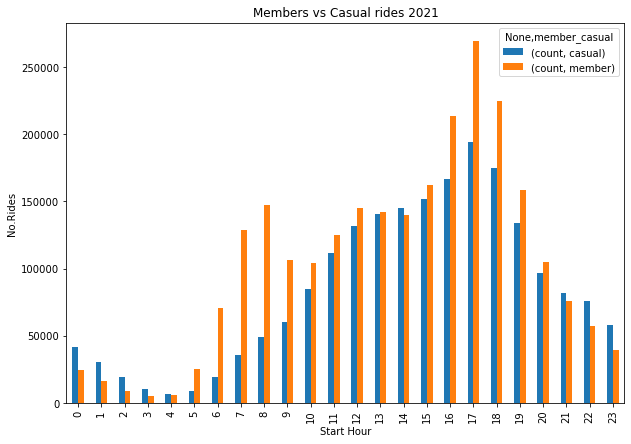

In [14]:
pd.pivot_table(df_cyclistic,
               index='start_hour', columns='member_casual',values='start_date',
               aggfunc = ['count']).plot(kind ='bar',xlabel = "Start Hour",ylabel="No.Rides", title= "Members vs Casual rides 2021",figsize=(10,7))

## 3.3
## Total Ride Duration Member/Casual

<AxesSubplot:xlabel='member_casual', ylabel='ride_duration_mins'>

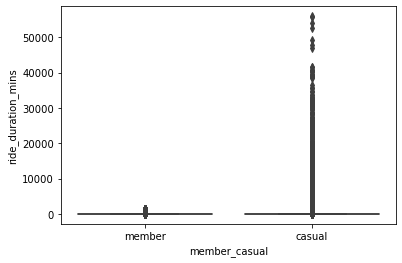

In [15]:
sns.boxplot(data = df_cyclistic, x ='member_casual', y = 'ride_duration_mins', order = ['member', 'casual'])
#boxplot to show the ride duration in mins between members and casual riders

## 3.4 Number Of Rides By Month, Member/Casual

In [16]:
pd.pivot_table(df_cyclistic,
               index='start_month', columns='member_casual',values='start_date',
               aggfunc = ['count'],)

count        
member_casual  casual  member
start_month                  
April          119362  175261
August         338138  327946
December        44684  129321
February         8508   33793
January         14583   68039
July           365513  317690
June           300769  299743
March           75059  128349
May            214652  230505
November        69267  182922
October        187324  284140
September      290078  323287

<AxesSubplot:title={'center':'Number Of Rides By Month, Member/Casual Year 2021'}, xlabel='Month', ylabel='No.Rides'>

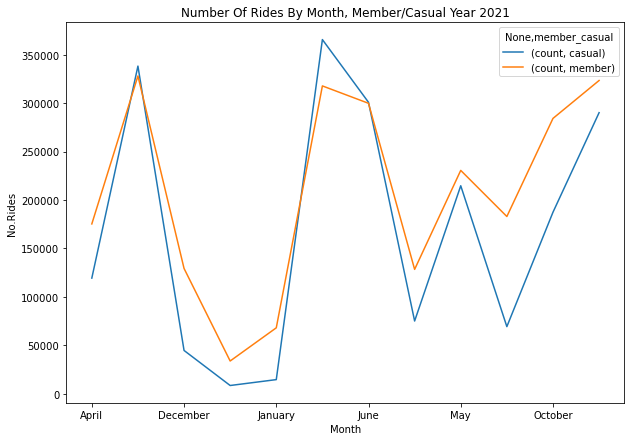

In [33]:
pd.pivot_table(df_cyclistic,
               index='start_month', columns='member_casual',values='start_date',
               aggfunc = ['count'],).plot(kind="line", xlabel = "Month",ylabel="No.Rides",title = "Number Of Rides By Month, Member/Casual Year 2021",figsize = (10,7))

## 3.5 Bike Type Preference

In [23]:
pd.pivot_table(df_cyclistic,
               index='member_casual', columns='rideable_type',values='start_date',
               aggfunc = ['count'],)

count                          
rideable_type classic_bike docked_bike electric_bike
member_casual                                       
casual             1248437      310098        469402
member             1951820           1        549175

<AxesSubplot:title={'center':'Bike Preferences of Member/Casual'}, xlabel='Bike Type', ylabel='No.Rides (100,000)'>

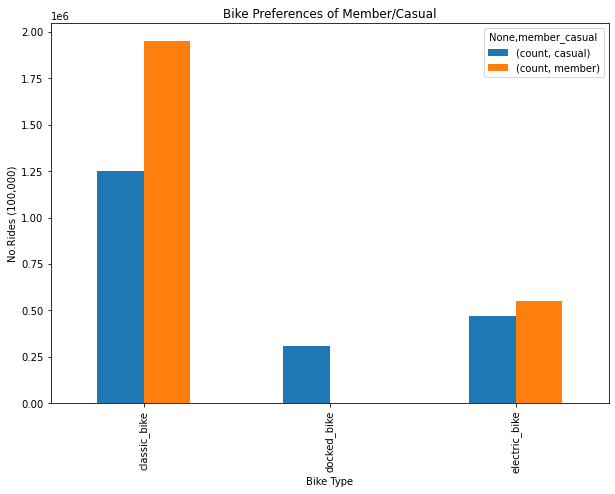

In [32]:
# chart shows values by by 100,000. Didn't condense values as pivot table illustrates values.
pd.pivot_table(df_cyclistic,
               index='rideable_type', columns='member_casual',values='start_date',
               aggfunc = ['count'],).plot(kind="bar",xlabel = "Bike Type",ylabel="No.Rides (100,000)",title = "Bike Preferences of Member/Casual",figsize = (10,7))

# Conclusions from the data
### There is alot of information to digest. I will give my conclusions based on the data and will then advise on schemes that could be implemented to capitalise on the findings.
### Firstly - A logical conclusion from the data would be that mostly all members live in the Detroit area. This is a reasonable conclusion as a subscription based service would only benefit someone who can use it consistently. This is however very limited as it requires a conclusive leap and I do not have access to data which would outline the type of subscription schemes available (annual membership, monthly or even weekly). Due to this it would be wrong to make a categorically conclusive statement on the commitments of members vs casual users.
### So what do we know from an observable perspective? We know members use electric bikes more than casual users - (fig3.5), are more likely to use the service through the winter months - (fig 3.4), have a smaller total ride duration - (fig 3.3) (most likely from commuting and not using it for other purposes such as sightseeing etc....) and are more likely to use the service during commuting hours - (fig 3.2). Based on this limited data I think it’s safe to conclude that members are using this service primarily for work transportation. Casual riders may also use it for this however, due to a much higher total ride duration - (fig3.3). I think it is reasonable to conclude that a vast quantity of people in this sample are using it for tourism or sightseeing.

# My recommendations
### I would strongly advise my stakeholders to implement a scheme that sees a discount on bike services during the winter months, as well as a reduction in cost for off peak bike usage, figs 3.2 and 3.4 would clearly support this as bike usage is dramatically lower during these times and a reduction in price may be able to offset the value lost from less usage by encouraging more people to use the service. Again I do not have access to the financial data to determine if this would be a reasonable suggestion but from the limited data and my understanding of it I believe it to be the best course of action.